# Climatology of modelled sea ice thickness

In [1]:
import pickle
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

%matplotlib inline

#### Parameters:

In [2]:
# Domain dimensions:
imin, imax = 1479, 2179
jmin, jmax = 159, 799
isize = imax - imin
jsize = jmax - jmin

# Folders:
folder_ANHA12  = '/data/brogalla/ANHA12/'

# Colors:
land_color = '#a9a7a2'

Spatial variation in continental vs. glacial river contributions #### Load files:

In [3]:
# Meshmasks
mask          = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon_ANHA12    = np.array(mask.variables['nav_lon'])
lat_ANHA12    = np.array(mask.variables['nav_lat'])

In [4]:
# Ice climatology:
with xr.open_dataset(f'{folder_ANHA12}ice_climatology.nc') as file:
    ice_thickness = file['iicethic'].values[:,0,:,:]

In [5]:
ice_thickness[np.isnan(ice_thickness)] = 0.0

#### Figures

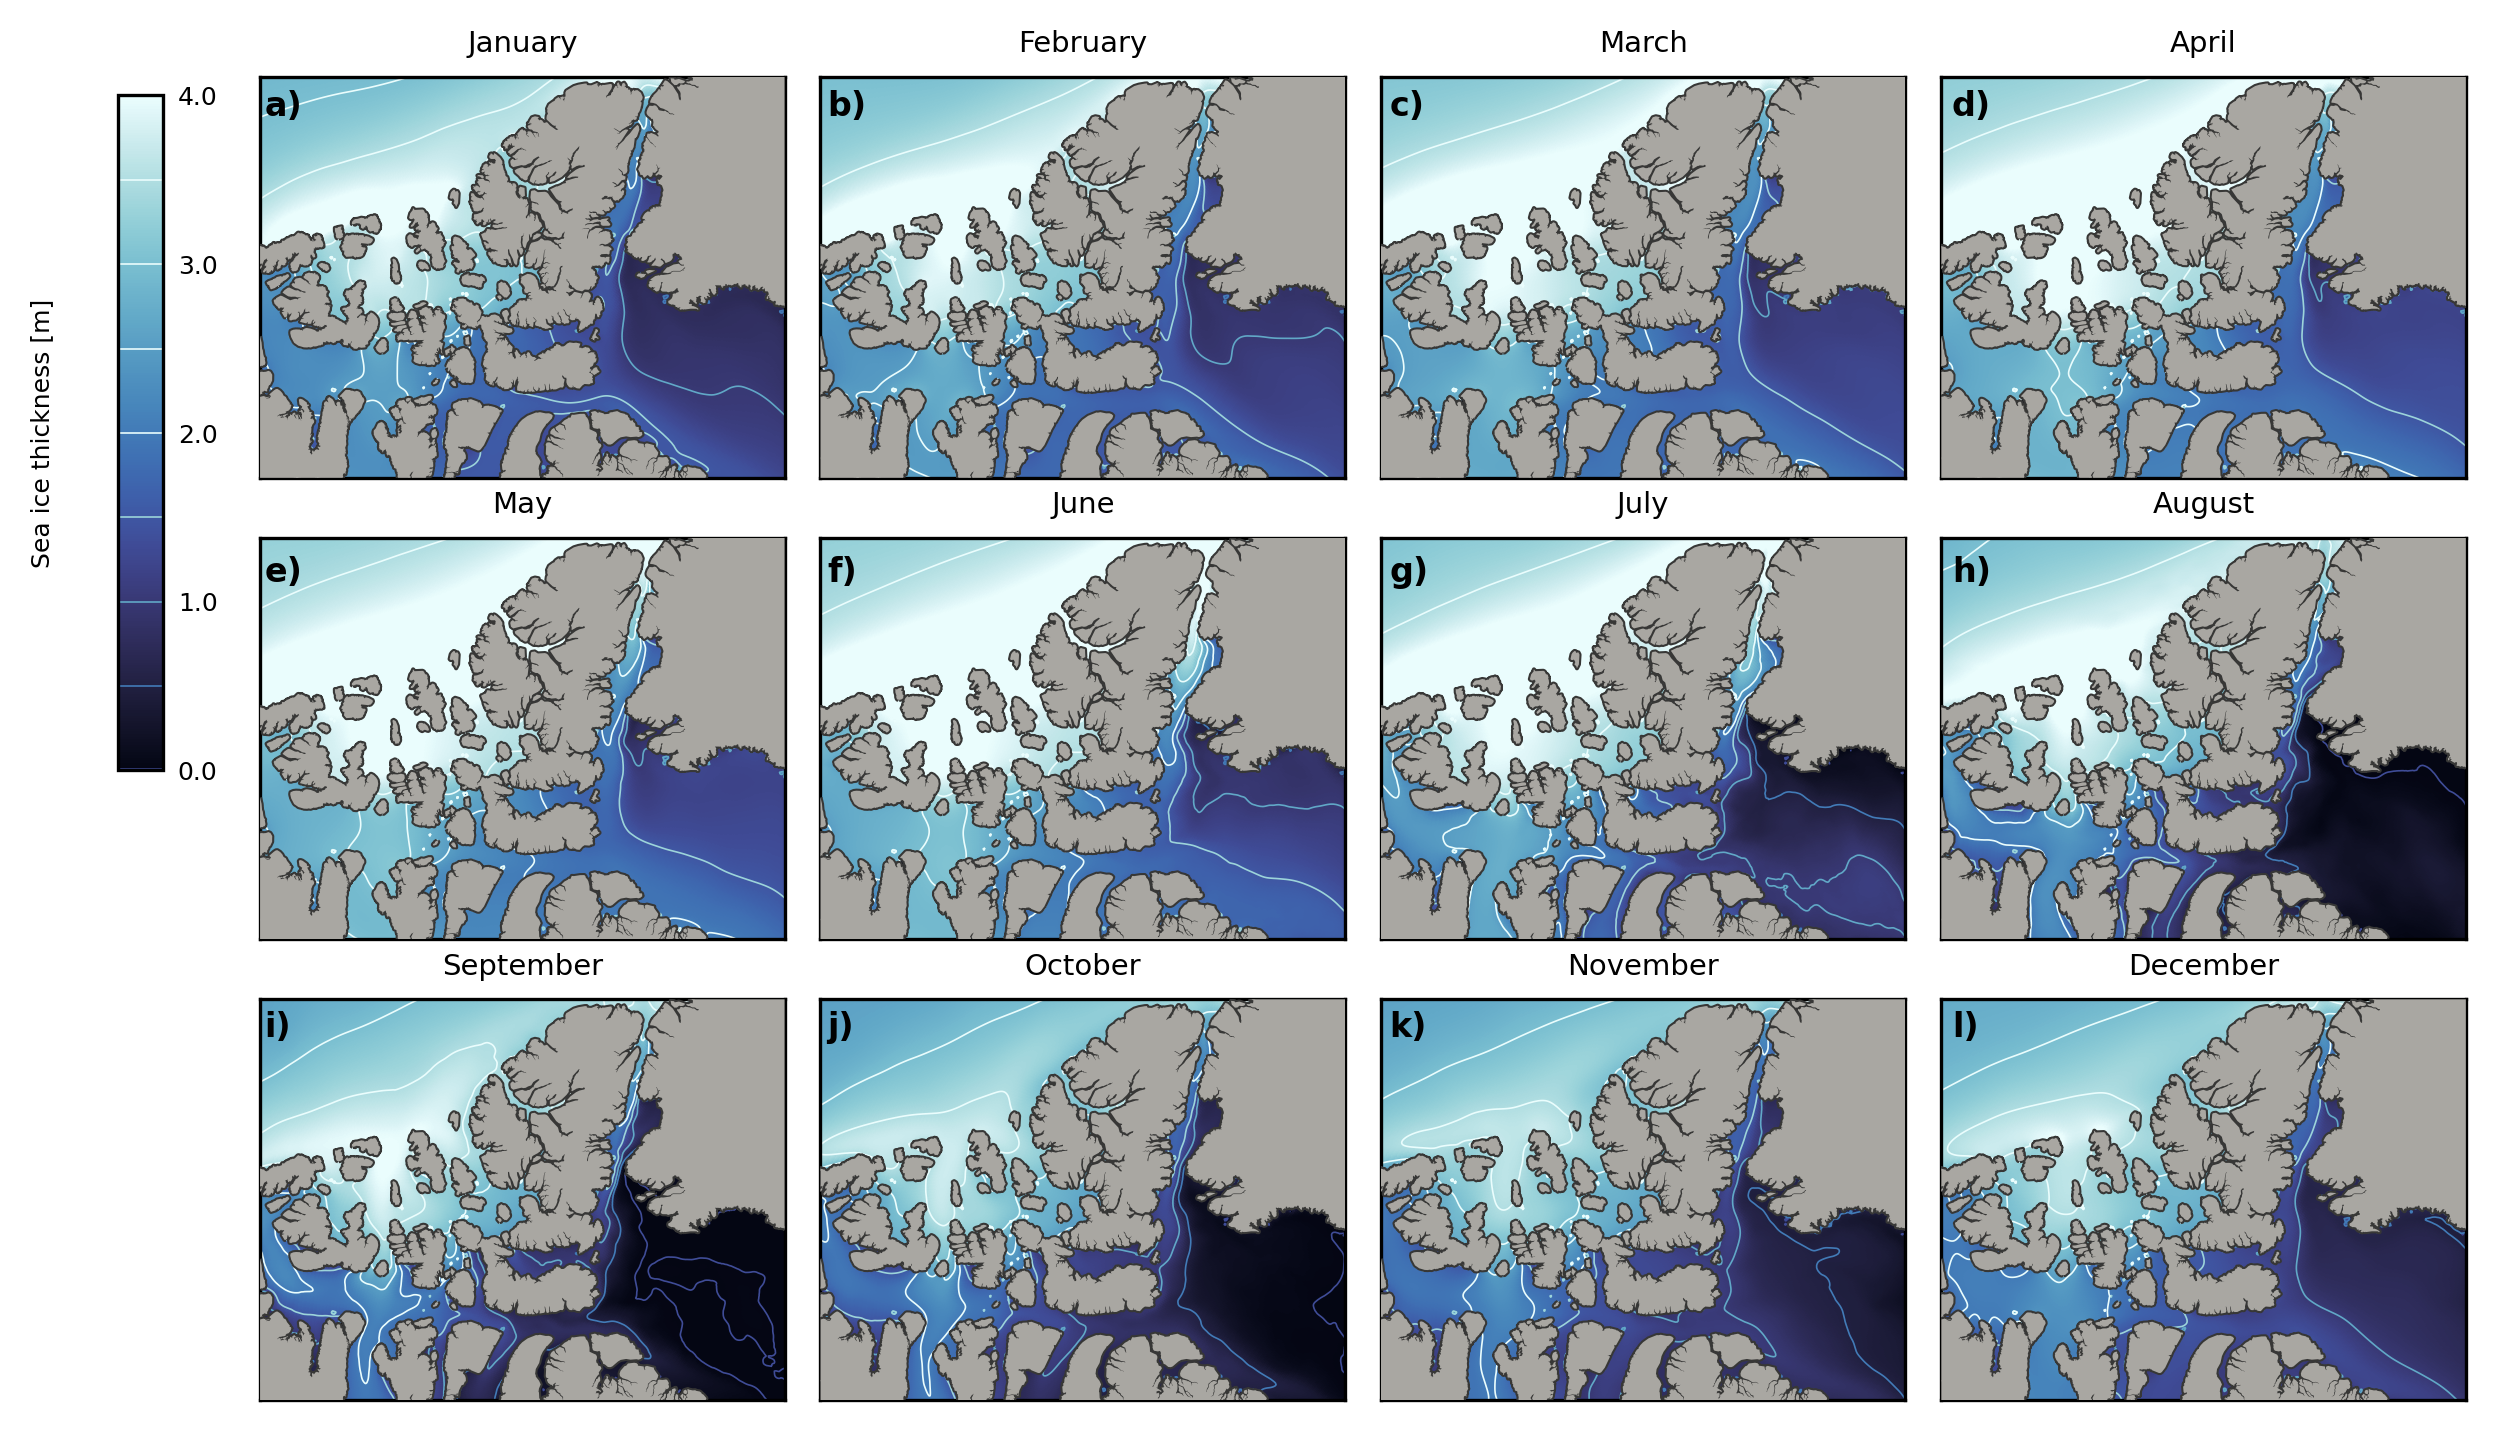

In [6]:
fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/glacial-month-grid.pickle','rb'))

#---------------------
x_model1, y_model1 = proj1(lon_ANHA12, lat_ANHA12)

# Contour lines:
ice_levels = [0.01,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]

months = np.arange(0,13,1)
titles = ['January','February','March','April','May','June','July',\
          'August','September','October','November','December']

for m,axis in enumerate(ax[:,:].ravel()):    
    CS1 = proj1.pcolormesh(x_model1, y_model1, ice_thickness[months[m],:,:], vmin=0, vmax=4, cmap=cmocean.cm.ice, ax=axis)
    outline = proj1.contour(x_model1, y_model1, ice_thickness[months[m],:,:], 
                            levels=ice_levels, vmin=-1, vmax=2, cmap=cmocean.cm.ice, linewidths=0.4, ax=axis)
    axis.set_title(titles[m], fontsize=7)

# Colorbars:
cbaxes1 = fig.add_axes([-0.05, 0.48, 0.02, 0.5])  
CBar1   = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1, ticks=np.arange(0,6,1))
CBar1.add_lines(outline)
CBar1.set_label('Sea ice thickness [m]', labelpad=-45, fontsize=6)
CBar1.ax.tick_params(axis='y', length=0, labelsize=6)
CBar1.ax.set_yticklabels([f'{i:.1f}' for i in CBar1.get_ticks()]);

# add text labels:
fig.text(0.015, 0.965, 'a)', fontsize=8, weight='bold');
fig.text(0.265, 0.965, 'b)', fontsize=8, weight='bold');
fig.text(0.515, 0.965, 'c)', fontsize=8, weight='bold');
fig.text(0.765, 0.965, 'd)', fontsize=8, weight='bold');

fig.text(0.015, 0.62, 'e)', fontsize=8, weight='bold');
fig.text(0.265, 0.62, 'f)', fontsize=8, weight='bold');
fig.text(0.515, 0.62, 'g)', fontsize=8, weight='bold');
fig.text(0.765, 0.62, 'h)', fontsize=8, weight='bold');

fig.text(0.015, 0.283, 'i)', fontsize=8, weight='bold');
fig.text(0.265, 0.283, 'j)', fontsize=8, weight='bold');
fig.text(0.515, 0.283, 'k)', fontsize=8, weight='bold');
fig.text(0.765, 0.283, 'l)', fontsize=8, weight='bold');

plt.subplots_adjust(hspace=0.15)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/S4-sea-ice-climatology-NS.png', bbox_inches='tight', dpi=300)

In [ ]:
fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/glacial-month-grid.pickle','rb'))

#---------------------
x_model1, y_model1 = proj1(lon_ANHA12, lat_ANHA12)

# Contour lines:
ice_levels = [0.01,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]

months = np.arange(0,13,1)
titles = ['January','February','March','April','May','June','July',\
          'August','September','October','November','December']

for m,axis in enumerate(ax[:,:].ravel()):    
    CS1 = proj1.pcolormesh(x_model1, y_model1, ice_thickness[months[m],:,:]-np.mean(ice_thickness,axis=0), \
                           vmin=-1, vmax=1, cmap=cmocean.cm.balance, ax=axis)
#     outline = proj1.contour(x_model1, y_model1, ice_thickness[months[m],:,:], 
#                             levels=ice_levels, vmin=-1, vmax=2, cmap=cmocean.cm.ice, linewidths=0.4, ax=axis)
    axis.set_title(titles[m], fontsize=7)

# Colorbars:
cbaxes1 = fig.add_axes([-0.05, 0.48, 0.02, 0.5])  
CBar1   = plt.colorbar(CS1, ax=ax[0,0], cax=cbaxes1)#, ticks=np.arange(0,6,1))
CBar1.add_lines(outline)
CBar1.set_label('Sea ice thickness [m]', labelpad=-45, fontsize=6)
CBar1.ax.tick_params(axis='y', length=0, labelsize=6)
CBar1.ax.set_yticklabels([f'{i:.1f}' for i in CBar1.get_ticks()]);

# add text labels:
fig.text(0.015, 0.965, 'a)', fontsize=8, weight='bold');
fig.text(0.265, 0.965, 'b)', fontsize=8, weight='bold');
fig.text(0.515, 0.965, 'c)', fontsize=8, weight='bold');
fig.text(0.765, 0.965, 'd)', fontsize=8, weight='bold');

fig.text(0.015, 0.62, 'e)', fontsize=8, weight='bold');
fig.text(0.265, 0.62, 'f)', fontsize=8, weight='bold');
fig.text(0.515, 0.62, 'g)', fontsize=8, weight='bold');
fig.text(0.765, 0.62, 'h)', fontsize=8, weight='bold');

fig.text(0.015, 0.283, 'i)', fontsize=8, weight='bold');
fig.text(0.265, 0.283, 'j)', fontsize=8, weight='bold');
fig.text(0.515, 0.283, 'k)', fontsize=8, weight='bold');
fig.text(0.765, 0.283, 'l)', fontsize=8, weight='bold');

plt.subplots_adjust(hspace=0.15)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/S4-sea-ice-climatology-NS.png', bbox_inches='tight', dpi=300)

In [ ]:
fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/continental-month-grid.pickle','rb'))

#---------------------
x_model1, y_model1 = proj1(lon_ANHA12, lat_ANHA12)

# Contour lines:
ice_levels = [0.01,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]

months = np.arange(0,13,1)
titles = ['January','February','March','April','May','June','July',\
          'August','September','October','November','December']

for m,axis in enumerate(ax[:,:].ravel()):    
    CS2 = proj1.pcolormesh(x_model1, y_model1, ice_thickness[months[m],:,:], vmin=0, vmax=3, cmap=cmocean.cm.ice, ax=axis)
    outline = proj1.contour(x_model1, y_model1, ice_thickness[months[m],:,:], 
                            levels=ice_levels, vmin=-1, vmax=2, cmap=cmocean.cm.ice, linewidths=0.4, ax=axis)
    axis.set_title(titles[m], fontsize=7)
    
# Colorbars:
cbaxes1 = fig.add_axes([-0.05, 0.46, 0.02, 0.5])  
CBar1   = plt.colorbar(CS2, ax=ax[0,0], cax=cbaxes1, ticks=np.arange(0,6,1))
CBar1.add_lines(outline)
CBar1.set_label('Sea ice thickness [m]', labelpad=-45, fontsize=6)
CBar1.ax.tick_params(axis='y', length=0, labelsize=6)
CBar1.ax.set_yticklabels([f'{i:.1f}' for i in CBar1.get_ticks()]);

# add text labels:
fig.text(0.015, 0.94, 'a)', fontsize=8, weight='bold');
fig.text(0.265, 0.94, 'b)', fontsize=8, weight='bold');
fig.text(0.515, 0.94, 'c)', fontsize=8, weight='bold');
fig.text(0.765, 0.94, 'd)', fontsize=8, weight='bold');

fig.text(0.015, 0.61, 'e)', fontsize=8, weight='bold');
fig.text(0.265, 0.61, 'f)', fontsize=8, weight='bold');
fig.text(0.515, 0.61, 'g)', fontsize=8, weight='bold');
fig.text(0.765, 0.61, 'h)', fontsize=8, weight='bold');

fig.text(0.015, 0.283, 'i)', fontsize=8, weight='bold');
fig.text(0.265, 0.283, 'j)', fontsize=8, weight='bold');
fig.text(0.515, 0.283, 'k)', fontsize=8, weight='bold');
fig.text(0.765, 0.283, 'l)', fontsize=8, weight='bold');

fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/S5-sea-ice-climatology-BS.png', bbox_inches='tight', dpi=300)